In [10]:
using Flux
using Flux: onehotbatch, argmax, mse, throttle, accuracy
using Base.Iterators: partition
using Images
using MNIST

For this model we'll learn a compression scheme. The idea is to encode MNIST digits as small vectors that can then be decoded back into the original image.

In [ ]:
x, _ = traindata()
x ./= 255

# Partition into batches of size 1000
data = [(x[:,i],) for i in partition(1:60_000, 1000)];

In [56]:
N = 32 # Size of the encoding

encoder = Dense(28^2, N, relu)
decoder = Dense(N, 28^2, relu)

m = Chain(encoder, decoder)

loss(x) = mse(m(x), x)

loss (generic function with 1 method)

It's useful to be able to visualise what's happening in the network.

In [57]:
img(x::Vector) = Gray.(reshape(clamp.(x, 0, 1), 28, 28))

img (generic function with 1 method)

First MNIST digit:

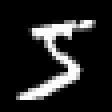

In [58]:
img(x[:,1])

Round-trip through the model:

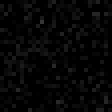

In [59]:
img(m(x[:,1]).data)

Random selection of 20 images:

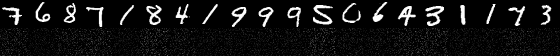

In [60]:
function sample()
  # 20 random digits
  xs = [x[:, i] for i in rand(1:size(x, 2), 20)]
  # Before and after images
  before, after = img.(xs), img.(map(x -> m(x).data, xs))
  # Stack them all together
  hcat(vcat.(before, after)...)
end
sample()

INFO: Epoch 1


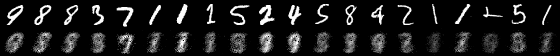

Loss is 0.0482313

INFO: Epoch 2


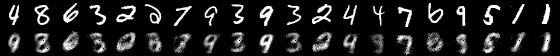

Loss is 0.0309322

INFO: Epoch 3


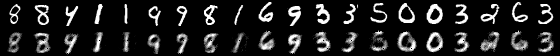

Loss is 0.0242661

INFO: Epoch 4


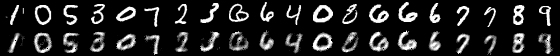

Loss is 0.0208236

INFO: Epoch 5


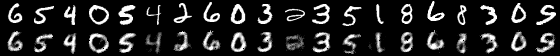

Loss is 0.018494

In [61]:
evalcb = function ()
    print_with_color(:blue, "Loss is $(loss(data[1][1]).data)")
    display(sample())
end
opt = ADAM(params(m))

for i = 1:5
    info("Epoch $i")
    Flux.train!(loss, data, opt)
    evalcb()
end